## Modeling a region of the chromatin

__running time__: < 60 min

After the optimization step we have to create an ensemble of models using the optimal set of parameters that maximize our correlation with the input data.

### PSC cell

In [1]:
%%bash

tadbit describe -w ../results/PSC_rep1/ -t 13

,-----------------.
| MODELED_REGIONs |
,----.-------.-------.--------.------------.--------.-------.-------.
| Id | JOBid |  Type | PATHid |  PARAM_md5 |   RESO |   BEG |   END |
|----+-------+-------+--------+------------+--------+-------+-------|
|  1 |    26 | OPTIM |     62 | 49e20a90c8 | 10,000 | 3,395 | 3,545 |
'----^-------^-------^--------^------------^--------^-------^-------'


From the models produced (n_models) we will tell TADbit to conserve a number of them (n_keep) that best satisfy the imposed restraints.

The final ensemble is built with the `tadbit model` and the `--model` flag. To pass to tadbit which matrix we want to use we pass the `jobid` of the previously generated text matrix. The following command takes around 20 minutes with 8 cpus:

In [2]:
%%bash

tadbit model -w ../results/PSC_rep1/ \
    --reso 10000 \
    --crm chr3 \
    --beg 33950000 --end 35450000 \
    --nmodels 2000 --nkeep 1000 \
    --cpu 8 \
    --jobid 25 \
    --model

     o Loading Hi-C matrix

        Modeling
********

          - Region: Chromosome chr3 from 33950000 to 35450000 at resolution 10 kb (150 particles)

     o Loading optimized parameters
Loaded UpFreq:   0.6 LowFreq:   -0.8 MaxDist:    250 scale:  0.01 cutoff:      2 Correlation:0.72
       1/1         0.6    -0.8     250   0.01     2.0 | 0.7301


The result is the generated ensemble of models in a format that can be loaded in the python TADbit library stored in the `07_model/<id>` subfolder.

In [3]:
%%bash

tadbit describe -w ../results/PSC_rep1/ -t 13

,-----------------.
| MODELED_REGIONs |
,----.-------.-------.--------.------------.--------.-------.-------.
| Id | JOBid |  Type | PATHid |  PARAM_md5 |   RESO |   BEG |   END |
|----+-------+-------+--------+------------+--------+-------+-------|
|  1 |    26 | OPTIM |     62 | 49e20a90c8 | 10,000 | 3,395 | 3,545 |
|  2 |    27 | MODEL |     72 | a66efe4b3f | 10,000 | 3,395 | 3,545 |
'----^-------^-------^--------^------------^--------^-------^-------'


`tadbit model` provides some out-of-the-box analysis of the generated models. To produce them we use the tool again with the `--analyze` flag:

In [4]:
%%bash

tadbit model -w ../results/PSC_rep1 \
    --analyze

Number of singletons excluded from clustering: 40 (total singletons: 42)
Total number of clusters: 77
   Cluster #1 has 249 models [top model: 1831]
   Cluster #2 has 221 models [top model: 590]
   Cluster #3 has 36 models [top model: 902]
   Cluster #4 has 33 models [top model: 23]
   Cluster #5 has 28 models [top model: 1478]
   Cluster #6 has 27 models [top model: 199]
   Cluster #7 has 26 models [top model: 950]
   Cluster #8 has 23 models [top model: 1412]
   Cluster #9 has 15 models [top model: 286]
   Cluster #10 has 15 models [top model: 1151]
   Cluster #11 has 14 models [top model: 634]
   Cluster #12 has 11 models [top model: 739]
   Cluster #13 has 11 models [top model: 1598]
   Cluster #14 has 11 models [top model: 552]
   Cluster #15 has 11 models [top model: 399]
   Cluster #16 has 11 models [top model: 620]
   Cluster #17 has 11 models [top model: 1720]
   Cluster #18 has 9 models [top model: 312]
   Cluster #19 has 9 models [top model: 1203]
   Cluster #20 has 8 models


        Analysis

          - Region: Chromosome chr3 from 3396 to 3545 at resolution 10 kb (150 particles)
            
	Correlation with data...
	 Correlation coefficient: 0.7300696444463305 [p-value: 0.0]
	Z-score plot...
	Clustering all models into sets of structurally similar models...
   fact = 0.95
      cutoff = 100.0
	Saving again the models this time with clusters...
/scratch/3DAROC21/miniconda2/envs/tadbit/lib/python3.7/site-packages/pytadbit/modelling/structuralmodels.py:2593: UserWarning: WARNING: chrom_start variable wasn't set, setting it to the position in the experiment matrix (33950000)
  if isinstance(my_descr['start'], list) else my_descr['start'])))
/scratch/3DAROC21/miniconda2/envs/tadbit/lib/python3.7/site-packages/pytadbit/modelling/structuralmodels.py:2599: UserWarning: WARNING: chrom_end variable wasn't set, setting it to the position in the experiment matrix (35450000)
  if isinstance(my_descr['end'], list) else my_descr['end'])))
		Writing models, list and 

In [6]:
%%bash

ls ../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/

a66efe4b3f.json
a66efe4b3f.models
a66efe4b3f_accessibility.dat
a66efe4b3f_accessibility.pdf
a66efe4b3f_clusters.pdf
a66efe4b3f_consistency.dat
a66efe4b3f_consistency.pdf
a66efe4b3f_contact.dat
a66efe4b3f_corre_real.pdf
a66efe4b3f_density.dat
a66efe4b3f_density.pdf
a66efe4b3f_interactions.dat
a66efe4b3f_interactions.pdf
a66efe4b3f_obj-func.pdf
a66efe4b3f_pL.dat
a66efe4b3f_wang.dat
a66efe4b3f_wang.pdf
a66efe4b3f_zscores.pdf
cfg_250_0.6_-0.8_0.01
models


### B cell

In [7]:
%%bash

tadbit describe -w ../results/B_rep1/ -t 13

,-----------------.
| MODELED_REGIONs |
,----.-------.-------.--------.------------.--------.-------.-------.
| Id | JOBid |  Type | PATHid |  PARAM_md5 |   RESO |   BEG |   END |
|----+-------+-------+--------+------------+--------+-------+-------|
|  1 |    17 | OPTIM |     49 | adf8bdcee7 | 10,000 | 3,395 | 3,545 |
'----^-------^-------^--------^------------^--------^-------^-------'


In [8]:
%%bash

tadbit model -w ../results/B_rep1/ \
    --reso 10000 \
    --crm chr3 \
    --beg 33950000 --end 35450000 \
    --nmodels 2000 --nkeep 1000 \
    --cpu 16 \
    --jobid 16 \
    --model

     o Loading Hi-C matrix

        Modeling
********

          - Region: Chromosome chr3 from 33950000 to 35450000 at resolution 10 kb (150 particles)

     o Loading optimized parameters
Loaded UpFreq:  -0.8 LowFreq:   -1.4 MaxDist:    175 scale:  0.01 cutoff:      4 Correlation:nan
       1/1        -0.8    -1.4     175   0.01     2.0 | 0.6373


In [9]:
%%bash

tadbit describe -w ../results/B_rep1/ -t 13

,-----------------.
| MODELED_REGIONs |
,----.-------.-------.--------.------------.--------.-------.-------.
| Id | JOBid |  Type | PATHid |  PARAM_md5 |   RESO |   BEG |   END |
|----+-------+-------+--------+------------+--------+-------+-------|
|  1 |    17 | OPTIM |     49 | adf8bdcee7 | 10,000 | 3,395 | 3,545 |
|  2 |    18 | MODEL |     62 | 42d6ff17ca | 10,000 | 3,395 | 3,545 |
'----^-------^-------^--------^------------^--------^-------^-------'


In [10]:
%%bash

tadbit model -w ../results/B_rep1 \
    --analyze

Number of singletons excluded from clustering: 281 (total singletons: 306)
Total number of clusters: 187
   Cluster #1 has 27 models [top model: 777]
   Cluster #2 has 19 models [top model: 1495]
   Cluster #3 has 15 models [top model: 1641]
   Cluster #4 has 12 models [top model: 1372]
   Cluster #5 has 11 models [top model: 689]
   Cluster #6 has 10 models [top model: 1367]
   Cluster #7 has 10 models [top model: 1532]
   Cluster #8 has 9 models [top model: 235]
   Cluster #9 has 9 models [top model: 856]
   Cluster #10 has 9 models [top model: 807]
   Cluster #11 has 8 models [top model: 1315]
   Cluster #12 has 8 models [top model: 668]
   Cluster #13 has 8 models [top model: 470]
   Cluster #14 has 8 models [top model: 716]
   Cluster #15 has 8 models [top model: 1327]
   Cluster #16 has 8 models [top model: 147]
   Cluster #17 has 8 models [top model: 1542]
   Cluster #18 has 7 models [top model: 1165]
   Cluster #19 has 7 models [top model: 1266]
   Cluster #20 has 7 models [top


        Analysis

          - Region: Chromosome chr3 from 3396 to 3545 at resolution 10 kb (150 particles)
            
	Correlation with data...
	 Correlation coefficient: 0.6372552436760913 [p-value: 0.0]
	Z-score plot...
	Clustering all models into sets of structurally similar models...
   fact = 0.95
      cutoff = 100.0
	Saving again the models this time with clusters...
/scratch/3DAROC21/miniconda2/envs/tadbit/lib/python3.7/site-packages/pytadbit/modelling/structuralmodels.py:2593: UserWarning: WARNING: chrom_start variable wasn't set, setting it to the position in the experiment matrix (33950000)
  if isinstance(my_descr['start'], list) else my_descr['start'])))
/scratch/3DAROC21/miniconda2/envs/tadbit/lib/python3.7/site-packages/pytadbit/modelling/structuralmodels.py:2599: UserWarning: WARNING: chrom_end variable wasn't set, setting it to the position in the experiment matrix (35450000)
  if isinstance(my_descr['end'], list) else my_descr['end'])))
		Writing models, list and 

In [11]:
%%bash

ls ../results/B_rep1/07_model/42d6ff17ca_chr3_3396-3545/

42d6ff17ca.json
42d6ff17ca.models
42d6ff17ca_accessibility.dat
42d6ff17ca_accessibility.pdf
42d6ff17ca_clusters.pdf
42d6ff17ca_consistency.dat
42d6ff17ca_consistency.pdf
42d6ff17ca_contact.dat
42d6ff17ca_corre_real.pdf
42d6ff17ca_density.dat
42d6ff17ca_density.pdf
42d6ff17ca_interactions.dat
42d6ff17ca_interactions.pdf
42d6ff17ca_obj-func.pdf
42d6ff17ca_pL.dat
42d6ff17ca_wang.dat
42d6ff17ca_wang.pdf
42d6ff17ca_zscores.pdf
cfg_175_-0.8_-1.4_0.01
models


### Structural models analysis

The first task of the `--analysis` flag is to compute subpopulations of structures by clustering the ensemble by similarity using the Markov Cluster Algorithm (MCL). The analysis dendogram allows us to view the different clusters population and their OF values.

In [2]:
from IPython.display import IFrame

In [15]:
IFrame("../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/a66efe4b3f_clusters.pdf", width=900, height=800)

In [14]:
IFrame("../results/B_rep1/07_model/42d6ff17ca_chr3_3396-3545/42d6ff17ca_clusters.pdf", width=900, height=800)

Inside the `models` subfolder we find the coordinates of all the models in xyz and Chimera (https://www.cgl.ucsf.edu/chimera/) format organized by clusters.

In [16]:
%%bash

ls ../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/models/

Singletons
Singletons.lst
Singletons_superimpose.cmd
best.cmm
best.xyz
centroid.cmm
centroid.xyz
cl_1
cl_1.lst
cl_10
cl_10.lst
cl_10_superimpose.cmd
cl_11
cl_11.lst
cl_11_superimpose.cmd
cl_12
cl_12.lst
cl_12_superimpose.cmd
cl_13
cl_13.lst
cl_13_superimpose.cmd
cl_14
cl_14.lst
cl_14_superimpose.cmd
cl_15
cl_15.lst
cl_15_superimpose.cmd
cl_16
cl_16.lst
cl_16_superimpose.cmd
cl_17
cl_17.lst
cl_17_superimpose.cmd
cl_18
cl_18.lst
cl_18_superimpose.cmd
cl_19
cl_19.lst
cl_19_superimpose.cmd
cl_1_superimpose.cmd
cl_2
cl_2.lst
cl_20
cl_20.lst
cl_20_superimpose.cmd
cl_21
cl_21.lst
cl_21_superimpose.cmd
cl_22
cl_22.lst
cl_22_superimpose.cmd
cl_23
cl_23.lst
cl_23_superimpose.cmd
cl_24
cl_24.lst
cl_24_superimpose.cmd
cl_25
cl_25.lst
cl_25_superimpose.cmd
cl_26
cl_26.lst
cl_26_superimpose.cmd
cl_27
cl_27.lst
cl_27_superimpose.cmd
cl_28
cl_28.lst
cl_28_superimpose.cmd
cl_29
cl_29.lst
cl_29_superimpose.cmd
cl_2_superimpose.cmd
cl_3
cl_3.lst
cl_30
cl_30.lst
cl_30_superimpose.cmd
cl_31
cl_31.lst
cl_31

In [17]:
%%bash

head ../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/models/centroid.xyz -n 14

# ASSEMBLY        :  None
# CELL TYPE       :  None
# CHROMOSOME      :  chr3
# END             :  35450000
# EXPERIMENT TYPE :  Hi-C
# IDENTIFIER      :  None
# PROJECT         :  None
# RESOLUTION      :  10000
# RESTRICTION ENZYME :  None
# SPECIES         :  UNKNOWN
# START           :  33950000
1	chr3:33953396-33963395	-497.769	-9996.501	481.934
2	chr3:33963396-33973395	-520.384	-9977.995	569.415
3	chr3:33973396-33983395	-415.309	-10021.954	509.441


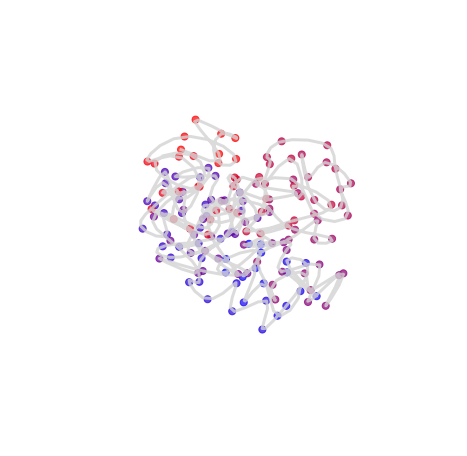

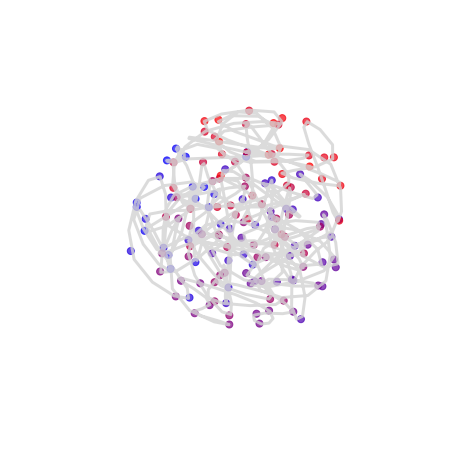

In [20]:
from pytadbit.utils.extraviews      import plot_3d_model
import numpy as np

centroid = np.loadtxt("../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/models/centroid.xyz",
                     usecols=[2,3,4])

x, y, z = centroid[:,0], centroid[:,1], centroid[:,2]
plot_3d_model(x, y, z, particle_size=50, alpha_part=0.7, azimuth=20, elevation=100.)

centroid = np.loadtxt("../results/B_rep1/07_model/42d6ff17ca_chr3_3396-3545/models/centroid.xyz",
                     usecols=[2,3,4])

x, y, z = centroid[:,0], centroid[:,1], centroid[:,2]
plot_3d_model(x, y, z, particle_size=50, alpha_part=0.7, azimuth=75, elevation=100.)

The z-score plot shows how the Hi-C values converted to z-scores are applied as restraints:

In [3]:
IFrame("../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/a66efe4b3f_zscores.pdf", width=900, height=600)

In [22]:
IFrame("../results/B_rep1/07_model/42d6ff17ca_chr3_3396-3545/42d6ff17ca_zscores.pdf", width=900, height=300)

The IMP objective function (OF) of the model that best satisfies the imposed restraints during the Monte Carlo optimization:

In [25]:
IFrame("../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/a66efe4b3f_obj-func.pdf", width=800, height=800)

We can check the correlation of models with the original HiC matrix in the correlation plot. 

In the plot "Real vs modelled data" we should see a positive correlation of the contacts in the models with the frequency of interaction of the pairs of beads in the HiC matrix. High interaction frequency between two loci in the matrix is reflected by the fact of having a high proportion of models where the beads representing those two loci are "in contact" (distance lower than the cutoff). 

In [26]:
IFrame("../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/a66efe4b3f_corre_real.pdf", width=900, height=350)

In [27]:
IFrame("../results/B_rep1/07_model/42d6ff17ca_chr3_3396-3545/42d6ff17ca_corre_real.pdf", width=900, height=350)

Model consistency gives a measure of the variability of the particles accross a set of models. Particles in the same position accross different models are considered consistent if their distance is less than the given cutoff.

In [28]:
IFrame("../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/a66efe4b3f_consistency.pdf", width=900, height=400)

In [29]:
IFrame("../results/B_rep1/07_model/42d6ff17ca_chr3_3396-3545/42d6ff17ca_consistency.pdf", width=900, height=400)

From the 3D models, the DNA density (or local compactness) can be calculated as the ratio of the bin size (in base pairs) and the distances between consequtive particles in the models. The higher the density the more compact DNA for the region. As this measure varies dramatically from particle to particle, one can calculate it using running averages.
</p>
<p>
In the modelling we have used a scale of 0.01 nm/bp; that means that if we expect 100 bp/nm of chromatin in each bead and between two consecutives beads.
<br style="clear: both;" />
</p>


In [31]:
IFrame("../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/a66efe4b3f_density.pdf", width=900, height=400)

In [32]:
IFrame("../results/B_rep1/07_model/42d6ff17ca_chr3_3396-3545/42d6ff17ca_density.pdf", width=900, height=400)

<p>
Walking_angle plots the angle between triplets of contiguous particles. The higher are these values the straighter are the models.
</p>

In [33]:
IFrame("../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/a66efe4b3f_wang.pdf", width=900, height=400)

In [34]:
IFrame("../results/B_rep1/07_model/42d6ff17ca_chr3_3396-3545/42d6ff17ca_wang.pdf", width=900, height=400)

<p>
Interactions plot (particles closer than the given cutoff)
</p>

In [35]:
IFrame("../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/a66efe4b3f_interactions.pdf", width=900, height=400)

In [36]:
IFrame("../results/B_rep1/07_model/42d6ff17ca_chr3_3396-3545/42d6ff17ca_interactions.pdf", width=900, height=400)

<p>
The accessibility is calculated by considering a mesh surface around the model and checking if each point of this mesh could be replaced by an object (i.e. a protein) represented as a sphere of a given radius.
</p>
<p>
Outer part of the model can be excluded from the estimation of accessible surface because contacts from this outer part to particles outside the model are unknown. To exclude the outer contour a sphere with a higher radius (superradius) is first tested in the mesh before proceding to the accessibility calculation.
</p>

In [37]:
IFrame("../results/PSC_rep1/07_model/a66efe4b3f_chr3_3396-3545/a66efe4b3f_accessibility.pdf", width=900, height=400)

In [38]:
IFrame("../results/B_rep1/07_model/42d6ff17ca_chr3_3396-3545/42d6ff17ca_accessibility.pdf", width=900, height=400)

### Questions

- Would you expect that running TADbit twice with the same parameters leads to the same set of models? Why yes? Why no?
- Can you comment on the conditions in which the TADbit models may result in highly variable or highly consistent structures?
- Can you comment on the main structural differences between the models obtained in B-cells and PSC?